In [1]:
import tensorflow
import numpy as np

In [2]:
from scipy import ndimage
import pydicom
from matplotlib import pyplot as plt

In [3]:
import os
%load_ext autoreload
%autoreload 2

'/home/simon/Music'

In [82]:
def downsample(image, size=(16,16)):
    zoom = [target / source for target, source in zip(size, image.shape) ]
    image = ndimage.zoom(image,zoom=zoom)
    return image

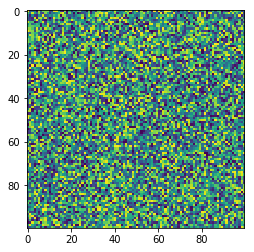

In [83]:
image = np.random.uniform(size=(100,100))
plt.imshow(image)

In [84]:
test_dims = np.random.randint(1,100,size=(50,2))
test_images = np.random.randint(1,100,size=(50,100,100))

In [86]:
for i1 in range(test_dims.shape[0]):
    shape = test_dims[i1]
    shape_real = downsample(test_images[i1],size=(shape)).shape
    assert (shape==shape_real).all()

[0.08, 0.86]
[0.92, 0.6]
[0.85, 0.3]
[0.99, 0.67]
[0.15, 0.59]
[0.62, 0.45]
[0.75, 0.23]
[0.83, 0.06]
[0.19, 0.54]
[0.23, 0.48]
[0.69, 0.67]
[0.34, 0.63]
[0.34, 0.1]
[0.25, 0.62]
[0.51, 0.23]
[0.21, 0.67]
[0.61, 0.41]
[0.05, 0.38]
[0.68, 0.19]
[0.22, 0.49]
[0.11, 0.45]
[0.15, 0.27]
[0.04, 0.94]
[0.4, 0.91]
[0.56, 0.53]
[0.5, 0.32]
[0.36, 0.88]
[0.28, 0.94]
[0.3, 0.45]
[0.55, 0.97]
[0.86, 0.05]
[0.48, 0.2]
[0.67, 0.91]
[0.03, 0.86]
[0.83, 0.45]
[0.53, 0.08]
[0.83, 0.95]
[0.45, 0.8]
[0.62, 0.6]
[0.13, 0.58]
[0.74, 0.54]
[0.12, 0.59]
[0.12, 0.93]
[0.48, 0.03]
[0.01, 0.88]
[0.55, 0.77]
[0.36, 0.94]
[0.99, 0.16]
[0.73, 0.99]
[0.72, 0.9]


In [76]:
ndimage.zoom(np.zeros((10,10,10)),zoom=2).shape

(20, 20, 20)

In [61]:
del masks

In [5]:
import preprocessing
import config

In [60]:
ad = preprocessing.AneurysmData(config.PATH)

In [64]:
ad.images.reshape(*ad.images.shape,1).shape

(106, 16, 16, 16, 1)

In [26]:
dist = np.array(ad.masks).flatten()

(array([36.,  8.,  4.,  0.,  4.,  1.,  1.,  2.,  2., 55.]),
 array([-110. ,   14.4,  138.8,  263.2,  387.6,  512. ,  636.4,  760.8,
         885.2, 1009.6, 1134. ]),
 <a list of 10 Patch objects>)

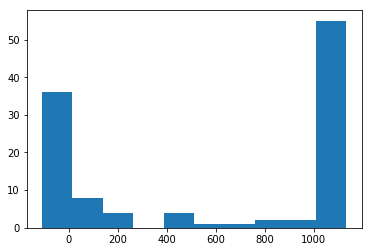

In [28]:
plt.hist(np.extract(dist != 0, dist))

In [49]:
file = pydicom.read_file(ad.paths_mask[2])

In [41]:
histo = list()
for path in ad.paths_mask:
    file = pydicom.read_file(path)
    histo.append(np.extract(file.pixel_array != 0.0, file.pixel_array))


In [ ]:
ad = preprocessing.AneurysmData(config.PATH, size=None)

In [15]:
ad.save_all(config.full_data_path)

True

In [92]:
def show_image(aneurysmData, N=4):
    image = ad.images[0]
    mask = ad.masks[0]
    plt.figure(dpi=800)
    plt.rcParams['figure.figsize'] = [20,20]
    fig, ax = plt.subplots(nrows=N, ncols=N)
    for i in range(N):
        for j in range(N):
            im = image[i+j*N,:,:]
            m = mask[i+j*N,:,:]
            ax[i,j].imshow(im,alpha=0.2,cmap="Greys_r")
            ax[i,j].imshow(m==0,alpha=0.8, cmap="cividis",vmin=0,vmax=1)
    return fig

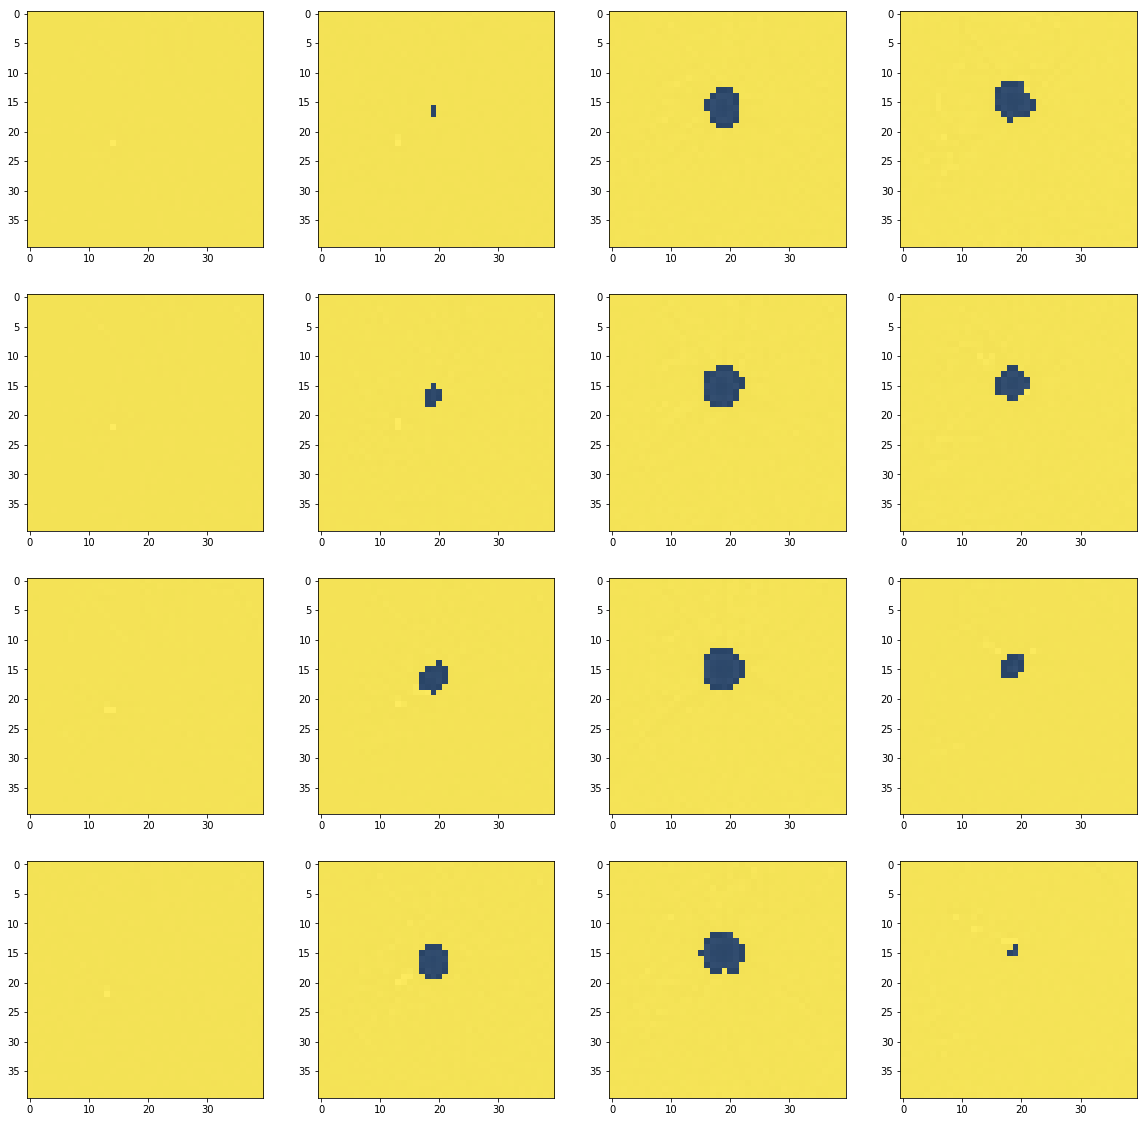

<Figure size 16000x16000 with 0 Axes>

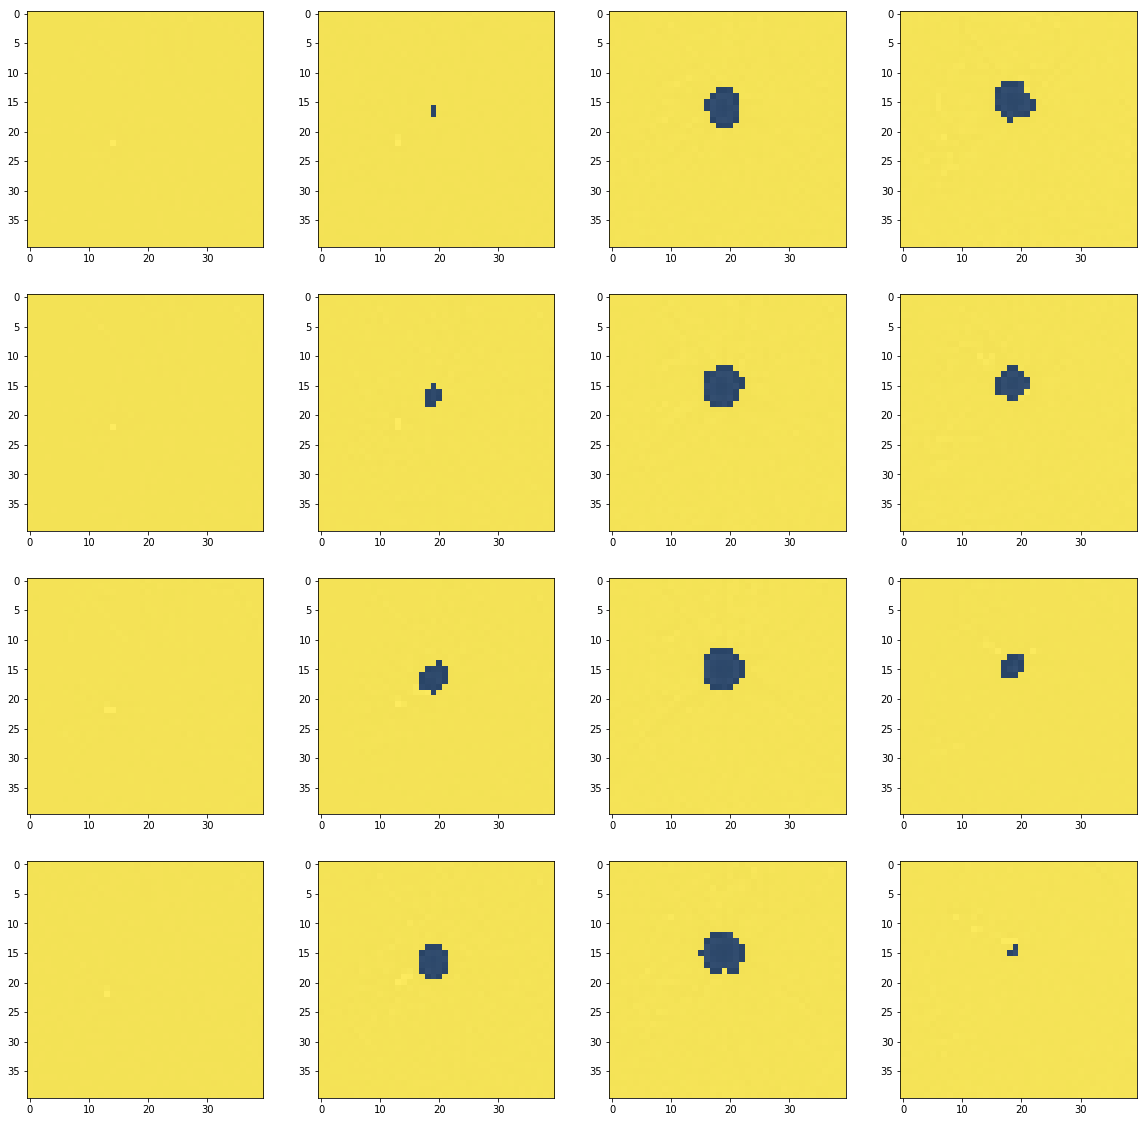

In [95]:
ad.show_image()

In [4]:
from data import patching
import numpy as np

In [15]:
arr = np.eye(10,10)
np.lib.stride_tricks.as_strided(arr,shape=(8,3,3),strides=(1,1,1))

array([[[1.00000000e+000, 1.77658241e-307, 3.47328271e-310],
        [1.77658241e-307, 3.47328271e-310, 1.35675106e-312],
        [3.47328271e-310, 1.35675106e-312, 5.29980882e-315]],

       [[1.77658241e-307, 3.47328271e-310, 1.35675106e-312],
        [3.47328271e-310, 1.35675106e-312, 5.29980882e-315],
        [1.35675106e-312, 5.29980882e-315, 2.07023782e-317]],

       [[3.47328271e-310, 1.35675106e-312, 5.29980882e-315],
        [1.35675106e-312, 5.29980882e-315, 2.07023782e-317],
        [5.29980882e-315, 2.07023782e-317, 8.08686649e-320]],

       [[1.35675106e-312, 5.29980882e-315, 2.07023782e-317],
        [5.29980882e-315, 2.07023782e-317, 8.08686649e-320],
        [2.07023782e-317, 8.08686649e-320, 3.11261357e-322]],

       [[5.29980882e-315, 2.07023782e-317, 8.08686649e-320],
        [2.07023782e-317, 8.08686649e-320, 3.11261357e-322],
        [8.08686649e-320, 3.11261357e-322, 0.00000000e+000]],

       [[2.07023782e-317, 8.08686649e-320, 3.11261357e-322],
        [8.086

In [53]:
def patch_3d(arr, shape, strides):
    dims = len(shape)
    windows = [int(np.ceil((x-(x_patch//2))/x_stride)) for x, x_patch, x_stride in zip(arr.shape,shape,strides)]
    
    return windows
arr = np.random.uniform(size = (6,6,6))
patch_3d(arr,(3,3,3),(2,2,2))

[3, 3, 3]

In [57]:
def get_patch(indices, arr, shape, strides):
    xyz_begin = [min(x_shape,x*stride) for x, stride, x_shape in zip(indices, strides, arr.shape)]
    xyz_end = [min(x_shape,x+x_patch) for x, x_patch,x_shape in zip(xyz_begin,shape,arr.shape)]
    xyz = xyz_begin+xyz_end
    return xyz
patch = get_patch((1,1,0),arr,(3,3,3),(2,2,2))

In [61]:
def cut_patch(arr,patch):
    return arr[patch[0]:patch[3], patch[1]:patch[4], patch[2]:patch[5]]

In [62]:
cut_patch(arr,patch).shape

(3, 3, 3)

In [65]:
np.save("/home/simon/test",arr)